In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Global parameter
gameweek = 16

# Get all gameweek data

In [3]:
# Initialize an empty list to store all individual, player gameweek data 
all_player_sep = []

# Loop through each gameweek
for i in range(1, gameweek + 1):  # Adjusting the range to start from 1 to gameweek
    # Read the CSV for the current gameweek
    x = pd.read_csv(rf'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Data\Players\Seperate_GW\GW_{i}.csv')
    
    # Append the current gameweek data to the list
    all_player_sep.append(x)

# Concatenate all dataframes in the list into a single dataframe
player_data = pd.concat(all_player_sep, axis=0, ignore_index=True)

# Drop unnamed column
player_data = player_data.drop(columns = ['Unnamed: 0'])

# Sort dataset correctly IMPORTANT
player_data = player_data.sort_values(by= ['Player ID','Gameweek'])

# Collect team_data from models

In [4]:
# Introduce models
m1 = pd.read_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Performance\Model_1_selection.csv')
m2 = pd.read_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Performance\Model_2_selection.csv')
m2_1 = pd.read_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Performance\Model_2.1_selection.csv')

# Function to convert model information
def convert_data(model):
    # Data list to store extracted information
    data = []

    # Iterate over each row in the DataFrame
    for index, row in model.iterrows():
        week = row['Gameweek']  # Extract the Gameweek for the current row
        
        # Loop through each column (excluding 'Gameweek' if necessary)
        for col in model.columns:
            if col != 'Gameweek':  # Skip the Gameweek column if not part of players
                player = row[col]  # Extract the player name or value from the column
                if pd.notnull(player):  # Check if the value is not NaN
                    # Append the Gameweek and player to the data list
                    data.append([week, player])

    # Convert the data list into a DataFrame
    result_model = pd.DataFrame(data, columns=['Gameweek', 'Last_Name'])

    return result_model


# Convert csv files to make useable
model_1 = convert_data(m1)
model_2 = convert_data(m2)
model_2_1 = convert_data(m2_1)

# Calculate weekly points

In [5]:
def merge_models (model, player_data):
    data = player_data.merge(model, on= ['Gameweek', 'Last_Name'])
    data = data[['Gameweek', 'Last_Name', 'GW Points']]
    return data

# Define a function to process and sum GW Points by Gameweek
def process_and_group(data, player_data):
    merged_data = merge_models(data, player_data)
    grouped_data = merged_data.groupby('Gameweek', as_index=False).sum('GW Points')
    return grouped_data

# Process each dataset
data_1_grouped = process_and_group(model_1, player_data)
data_2_grouped = process_and_group(model_2, player_data)
data_2_1_grouped = process_and_group(model_2_1, player_data)

# Merge all grouped data on Gameweek
final_data = data_1_grouped.merge(
    data_2_grouped, on='Gameweek', suffixes=('_data_1', '_data_2')
).merge(
    data_2_1_grouped, on='Gameweek', suffixes=('', '_data_2_1')
)

# Final data
final_data = pd.DataFrame(final_data)

# Rename columns for better readability
final_data.rename(columns={
    'GW Points_data_1': 'Model_1',
    'GW Points_data_2': 'Model_2',
    'GW Points': 'Model_2.1'
}, inplace=True)

# Display the renamed DataFrame
print(final_data)

    Gameweek  Model_1  Model_2  Model_2.1
0          5       66       62         68
1          6       50       57         44
2          7       48       52         53
3          8       35       39         55
4          9       49       66         78
5         10       35       39         42
6         11       64       69         61
7         12       56       55         53
8         13       42       83         78
9         14       44       53         97
10        15       28       26         44
11        16       30       72         53


In [6]:
# Export to csv
final_data.to_csv('Model_performance.csv')

KeyError: 'FPL_Average'

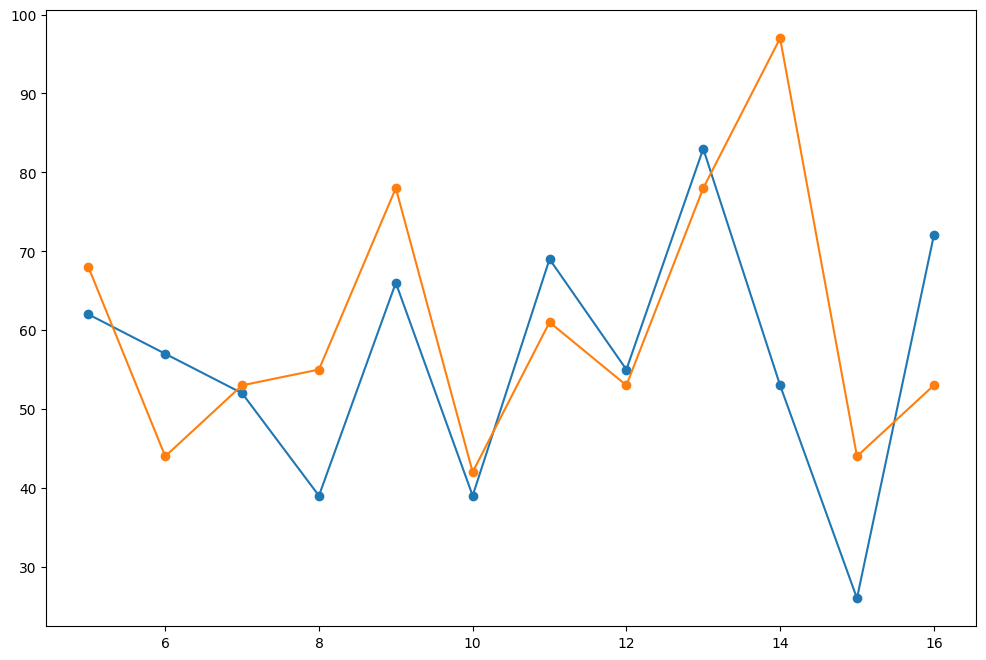

In [7]:
# Import performance csv
performance = pd.read_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Performance\Model_performance.csv')

# Create dataframe
df = pd.DataFrame(performance)

# Plot each column as a line graph
plt.figure(figsize=(12, 8))

# Plot lines for each column except 'Gameweek'
columns_to_plot = ['Model_2','Model_2.1', 'FPL_Average']
for column in columns_to_plot:
    plt.plot(df['Gameweek'], df[column], marker='o', label=column)

# Add title and labels
plt.title('FPL Model performance', fontsize=16)
plt.xlabel('Gameweek', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.xticks()

# Add legend
plt.legend(title="Metrics", fontsize=12)

# Show grid
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

In [8]:
# Assuming 'performance' is your DataFrame
column_sums = {}

# Iterating through each column and summing its values
for col in performance.columns:
    column_sums[col] = performance[col].sum()

# Printing the results
for col, total in column_sums.items():
    print(f"Sum of column '{col}': {total}")

Sum of column 'Gameweek': 126
Sum of column 'Model_1': 547
Sum of column 'Model_2': 673
Sum of column 'Model_2.1': 702
Sum of column 'FPL_Average': 596
Sum of column 'My Team': 725
Sum of column 'Cs Team': 801
